In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import spacy
import re
from nltk.corpus import stopwords

nlp=spacy.load('en_core_web_sm')

from tensorflow import keras 
import tensorflow as tf
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import warnings

import sumy
import nltk
import ssl
nltk.download('punkt')
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

[nltk_data] Downloading package stopwords to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jian
[nltk_data]     Wei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
root_path = '../Data_Files/'
data = pd.read_csv(root_path + 'hotels_reviews.csv')

In [7]:
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.username,sourceURLs,websites,language,reviews.clean_text,userCity_upper,userProvince_upper,is_state,user_country,ratingCategory
0,AVwc252WIN2L1WUfpqLP,2016-10-30 21:42:42,2018-09-10 21:06:27,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,Language.ENGLISH,experience rancho valencia absolutely perfect ...,UNKNOWN,UNKNOWN,0,UNKNOWN,2.0
1,AVwc252WIN2L1WUfpqLP,2016-10-30 21:42:42,2018-09-10 21:06:27,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,Language.ENGLISH,amazing place everyone extremely warm welcomin...,UNKNOWN,UNKNOWN,0,UNKNOWN,2.0
2,AVwc252WIN2L1WUfpqLP,2016-10-30 21:42:42,2018-09-10 21:06:27,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,Language.ENGLISH,book 3 night stay rancho valencia play tennis ...,UNKNOWN,UNKNOWN,0,UNKNOWN,2.0
3,AVwdOclqIN2L1WUfti38,2015-11-28 19:19:35,2018-09-10 21:06:16,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,Language.ENGLISH,currently bed write past hr 1/2 dog bark squea...,RICHMOND,VIRGINIA,1,UNITEDSTATES,0.0
4,AVwdOclqIN2L1WUfti38,2015-11-28 19:19:35,2018-09-10 21:06:16,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,Language.ENGLISH,live md aloft home away home stay 1 night 7716...,LAUREL,MARYLAND,1,UNITEDSTATES,2.0


In [ ]:
def summary(original_text):
  parser = PlaintextParser.from_string(original_text,Tokenizer('english'))
  lsa_summarizer = LsaSummarizer()
  summary= lsa_summarizer(parser.document,1)
  return str(summary)[12:-3]

data['LSA_Summary'] = data['reviews.text'].apply(summary)

In [ ]:
data[['reviews.text', 'reviews.clean_text', 'LSA_Summary']].head()

,reviews.text,reviews.clean_text,LSA_Summary
0,Our experience at Rancho Valencia was absolute...,experience rancho valencia absolutely perfect ...,Our experience at Rancho Valencia was absolute...
1,Amazing place. Everyone was extremely warm and...,amazing place everyone extremely warm welcomin...,Great for a romantic getaway or take the kids ...
2,We booked a 3 night stay at Rancho Valencia to...,book 3 night stay rancho valencia play tennis ...,This place is really over the top from a luxur...
3,Currently in bed writing this for the past hr ...,currently bed write past hr 1/2 dog bark squea...,Currently in bed writing this for the past hr ...
4,I live in Md and the Aloft is my Home away fro...,live md aloft home away home stay 1 night 7716...,Especially Olivia who was Extra special becaus...


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

In [ ]:
#Actual cleaning the summary
new_summarytext = data['LSA_Summary'].apply(summary_cleaner)
data['clean_summary'] = new_summarytext

In [ ]:
# Review the processing results
data['clean_summary'] = data['clean_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
# Remove non-alphabetic characters (Data Cleaning)
def text_strip(row):

        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

        # Remove _ if it occurs more than one time consecutively
        row = re.sub("(__+)", " ", str(row)).lower()

        # Remove - if it occurs more than one time consecutively
        row = re.sub("(--+)", " ", str(row)).lower()

        # Remove ~ if it occurs more than one time consecutively
        row = re.sub("(~~+)", " ", str(row)).lower()

        # Remove + if it occurs more than one time consecutively
        row = re.sub("(\+\++)", " ", str(row)).lower()

        # Remove . if it occurs more than one time consecutively
        row = re.sub("(\.\.+)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()

        return row

In [ ]:
data['reviews.processed_text']= data['reviews.text'].apply(text_strip)

In [ ]:
for i in range(10):
    print("Original Review:", data['reviews.text'][i])
    print("Cleaned Review:", data['reviews.processed_text'][i])
    print("Summary:", data['clean_summary'][i])
    print("\n")

Original Review: Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!
Cleaned Review: our experience at rancho valencia was absolutely perfect from beginning to end we felt special and very happy during our stayed would come back in heart beat 
Summary: _START_ our experience at rancho valencia was absolutely perfect from beginning to end  _END_


Original Review: Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definitely in our top 2. Great for a romantic getaway or take the kids along as we did. Had a couple stuffed animals waiting for our girls upon arrival. Can't wait to go back.
Cleaned Review: amazing place everyone was extremely warm and welcoming we ve stayed at some top notch places and this is definitely in our top great for romantic getaway or take the kids along as we did had couple stuffed animals w

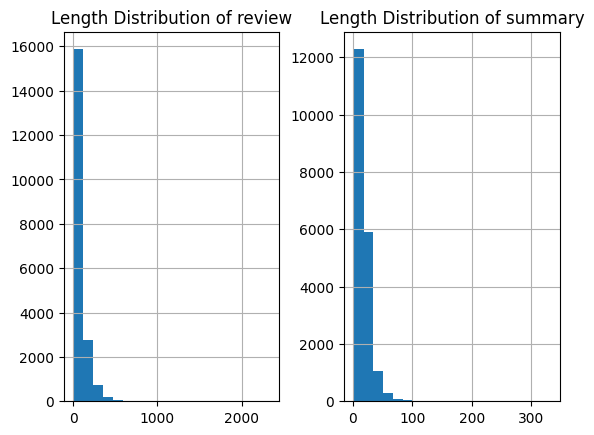

In [ ]:
# Check the length distribution of review and summary 
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['reviews.processed_text']:
      text_word_count.append(len(i.split()))

for j in data['clean_summary']:
      summary_word_count.append(len(j.split()))

length_df = pd.DataFrame({'Length Distribution of review':text_word_count, 'Length Distribution of summary':summary_word_count})
length_df.hist(bins = 20)
plt.show()

In [ ]:
# Fix maximum length of reviews text to 100 since that seems to be the majority review length. Similarly set the maximum summary length to 25.
review_sequence_size = 100
summary_sequence_size = 25

In [ ]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(data, test_size=0.2, random_state=1)
X_train,X_valid = train_test_split(X_train, test_size=0.25, random_state=1)

In [ ]:
TXT_KEY = 'reviews.processed_text'
def tokenize(txt):
    return ' '.join(word_tokenize(txt))
X_train[TXT_KEY] = X_train[TXT_KEY].astype(str).apply(tokenize)
X_valid[TXT_KEY] = X_valid[TXT_KEY].astype(str).apply(tokenize)
X_test[TXT_KEY] = X_test[TXT_KEY].astype(str).apply(tokenize)

Text Tokenisation

In [ ]:
summary_X_train = X_train["reviews.processed_text"]
summary_y_train = X_train["clean_summary"]

summary_X_val = X_valid["reviews.processed_text"]
summary_y_val = X_valid["clean_summary"]

summary_X_test = X_test["reviews.processed_text"]
summary_y_test = X_test["clean_summary"]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Review Text Tokeniser
# Prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(summary_X_train))

# Convert text sequences into integer sequences
summary_X_train    =   x_tokenizer.texts_to_sequences(summary_X_train) 
summary_X_val   =   x_tokenizer.texts_to_sequences(summary_X_val)
summary_X_test   =   x_tokenizer.texts_to_sequences(summary_X_test)

# Padding zero upto maximum length
summary_X_train    =   pad_sequences(summary_X_train,  maxlen=review_sequence_size, padding='post') 
summary_X_val   =   pad_sequences(summary_X_val, maxlen=review_sequence_size, padding='post')
summary_X_test   =   pad_sequences(summary_X_test, maxlen=review_sequence_size, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

# Summary Text Tokeniser
# Preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(summary_y_train))

# Convert summary sequences into integer sequences
summary_y_train    =   y_tokenizer.texts_to_sequences(summary_y_train) 
summary_y_val   =   y_tokenizer.texts_to_sequences(summary_y_val) 
summary_y_test   =   y_tokenizer.texts_to_sequences(summary_y_test) 

# Padding zero upto maximum length
summary_y_train    =   pad_sequences(summary_y_train, maxlen=summary_sequence_size, padding='post')
summary_y_val   =   pad_sequences(summary_y_val, maxlen=summary_sequence_size, padding='post')
summary_y_test   =   pad_sequences(summary_y_test, maxlen=summary_sequence_size, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

# Stacked Multi-layered LSTM

In [ ]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc_size))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(review_sequence_size,))

#embedding layer
enc_emb =  Embedding(x_voc_size, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc_size, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 20677
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     4135400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

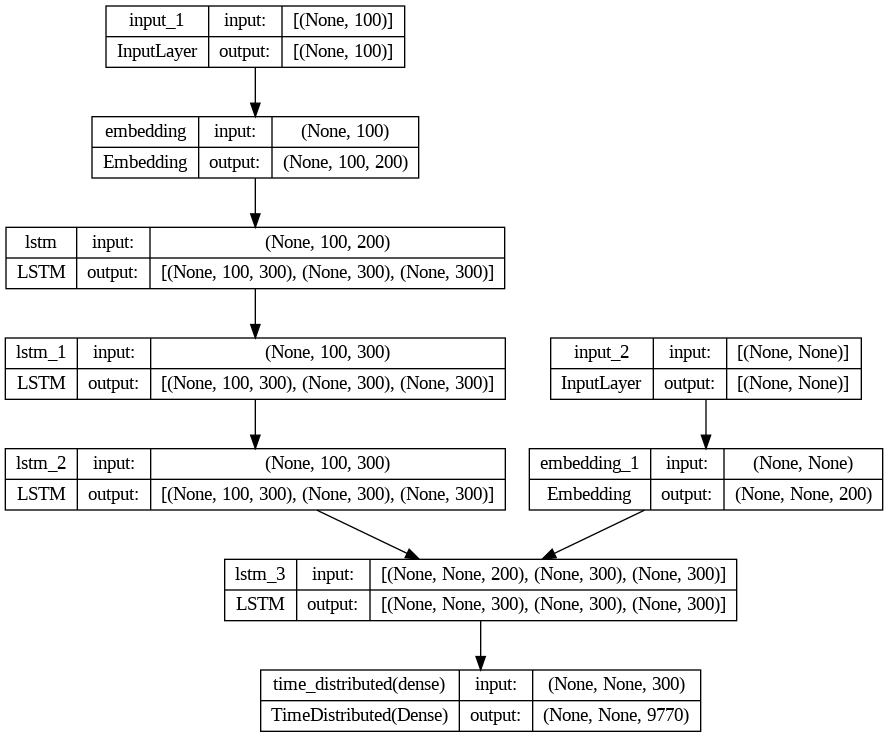

In [ ]:
plot_model(model, to_file='MultiStackedLSTM_model.png', show_shapes=True)

In [ ]:
history = model.fit([summary_X_train, summary_y_train[:,:-1]], summary_y_train.reshape(summary_y_train.shape[0], summary_y_train.shape[1], 1)[:,1:],
                  epochs=10, callbacks=[es], batch_size=128, 
                  validation_data=([summary_X_val, summary_y_val[:,:-1]], summary_y_val.reshape(summary_y_val.shape[0], summary_y_val.shape[1], 1)[:,1:]),
                  )

Epoch 1/10
93/93 [==============================] - 1104s 12s/step - loss: 4.0312 - val_loss: 3.8947
Epoch 2/10
93/93 [==============================] - 1105s 12s/step - loss: 3.9759 - val_loss: 3.8587
Epoch 3/10
93/93 [==============================] - 1022s 11s/step - loss: 3.9358 - val_loss: 3.8095
Epoch 4/10
93/93 [==============================] - 1021s 11s/step - loss: 3.9022 - val_loss: 3.7903
Epoch 5/10
93/93 [==============================] - 1305s 14s/step - loss: 3.8727 - val_loss: 3.7827
Epoch 6/10
93/93 [==============================] - 1289s 14s/step - loss: 3.8463 - val_loss: 3.7434
Epoch 7/10
93/93 [==============================] - 1269s 14s/step - loss: 3.8145 - val_loss: 3.7486
Epoch 8/10
93/93 [==============================] - 1317s 14s/step - loss: 3.7766 - val_loss: 3.7171
Epoch 9/10
93/93 [==============================] - 1314s 14s/step - loss: 3.7391 - val_loss: 3.6384
Epoch 10/10
93/93 [==============================] - 1205s 13s/step - loss: 3.6999 - val_lo

In [ ]:
reverse_target_word_index = y_tokenizer.index_word 
reverse_source_word_index = x_tokenizer.index_word 
target_word_index = y_tokenizer.word_index

In [ ]:
# Encoder inference
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(100, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq.reshape(1, review_sequence_size))

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= 100):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if ((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if (i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(20):
  print("Review:",seq2text(summary_X_val[i]))
  print("Original summary:",seq2summary(summary_y_val[i]))
  print("Predicted summary:",decode_sequence(summary_X_val[i]))
  print("\n")

Review: we loved this hotel first time at hilton head loved the bed and the pillows towels were very soft everything was clean and all the staff were very polite easy access to the beach only thing didn like was they gave you choice morethank you karen for taking the time to write thoughtful review about your visit to sonesta resort hilton head island and welcome we are glad to hear that you enjoyed our beautiful and convenient beach access outside fire pits and comfortable room accommodations we more 
Original summary: you choice morethank you karen for taking the time to write thoughtful review about your visit to sonesta resort hilton head island and welcome 
1/1 [==============================] - 0s 28ms/step
Predicted summary:  we are not stay at the hotel and we are not not stay


Review: it if you can find better price on hotel tonight but basically clean functional but you are on your own for food not for kids dear guy in london thank you for staying at hotel diva although our 

In [ ]:
for i in [3,48]:
  print("Review:",seq2text(summary_X_val[i]))
  print("Original summary:",seq2summary(summary_y_val[i]))
  print("Predicted summary:",decode_sequence(summary_X_val[i]))
  print("\n")

Review: good activities for kids pool and virtual reality room size coffee 
Original summary: good activities for kids pool and virtual reality room size coffee 
1/1 [==============================] - 0s 29ms/step
Predicted summary:  good location was very nice


Review: the rooms were spacious and had fridge with microwave the beds were very comfortable amenties were great breakfast was and yvonne at front desk was 
Original summary: the rooms were spacious and had fridge with microwave the beds were very comfortable were great breakfast was and at front desk was 
1/1 [==============================] - 0s 35ms/step
Predicted summary:  the staff was very nice and the room was very nice


